In [1]:
import os
import folium

print(folium.__version__)

0.5.0+133.gb65e002


In [2]:
import geopandas as gpd


assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)

In [3]:
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
5,2967004.0,Asia,Armenia,ARM,18770.0,"POLYGON ((43.58274580259273 41.09214325618257,..."
6,3802.0,Antarctica,Antarctica,ATA,760.4,(POLYGON ((-59.57209469261153 -80.040178725096...
7,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16.0,"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
8,21262641.0,Oceania,Australia,AUS,800200.0,(POLYGON ((145.3979781434948 -40.7925485166058...
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."


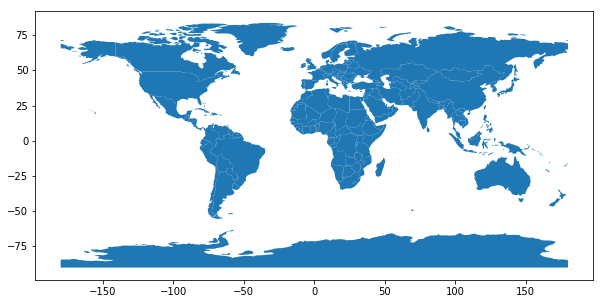

In [4]:
%matplotlib inline

ax = gdf.plot(figsize=(10, 10))

In [5]:
import pandas as pd


n_periods, n_sample = 48, 40

assert n_sample < n_periods

dt_index = pd.date_range(
    '2016-1-1', periods=n_periods, freq='M'
).strftime('%s')

dt_index

Index(['1454178600', '1456684200', '1459362600', '1461954600', '1464633000',
       '1467225000', '1469903400', '1472581800', '1475173800', '1477852200',
       '1480444200', '1483122600', '1485801000', '1488220200', '1490898600',
       '1493490600', '1496169000', '1498761000', '1501439400', '1504117800',
       '1506709800', '1509388200', '1511980200', '1514658600', '1517337000',
       '1519756200', '1522434600', '1525026600', '1527705000', '1530297000',
       '1532975400', '1535653800', '1538245800', '1540924200', '1543516200',
       '1546194600', '1548873000', '1551292200', '1553970600', '1556562600',
       '1559241000', '1561833000', '1564511400', '1567189800', '1569781800',
       '1572460200', '1575052200', '1577730600'],
      dtype='object')

In [6]:
import numpy as np


styledata = {}

for country in gdf.index:
    df = pd.DataFrame(
        {'color': np.random.normal(size=n_periods),
         'opacity': np.random.normal(size=n_periods)},
        index=dt_index
    )
    df = df.cumsum()
    df.sample(n_sample, replace=False).sort_index()
    styledata[country] = df


In [7]:
max_color, min_color, max_opacity, min_opacity = 0, 0, 0, 0

for country, data in styledata.items():
    max_color = max(max_color, data['color'].max())
    min_color = min(max_color, data['color'].min())
    max_opacity = max(max_color, data['opacity'].max())
    max_opacity = min(max_color, data['opacity'].max())

In [8]:
styledict = {
    str(country): data.to_dict(orient='index') for
    country, data in styledata.items()
}

In [10]:
from folium import plugins


m = folium.Map([0, 0], tiles='Stamen Toner', zoom_start=2)

g = plugins.TimeSliderChoropleth(
    gdf.to_json(),
    styledict=styledict,

).add_to(m)

m.save(os.path.join('.','TimeSliderChoropleth.html'))

m

In [11]:
import numpy as np


N = 100

data = np.array(
    [
        np.random.uniform(low=35, high=60, size=N),  # Random latitudes in Europe.
        np.random.uniform(low=-12, high=30, size=N),  # Random longitudes in Europe.
        range(N),  # Popups texts are simple numbers.
    ]
).T

m = folium.Map([45, 3], zoom_start=4)

plugins.MarkerCluster(data).add_to(m)
m

In [12]:
from folium.plugins.beautify_icon import BeautifyIcon
from folium import Marker
m = folium.Map([45.5, -122], zoom_start=3)

icon_plane = BeautifyIcon(
    icon='plane',
    border_color='#b3334f',
    text_color='#b3334f',
    icon_shape='triangle')

icon_number = BeautifyIcon(
    border_color='#00ABDC',
    text_color='#00ABDC',
    number=10,
    inner_icon_style='margin-top:0;')

Marker(
    location=[46, -122],
    popup='Portland, OR',
    icon=icon_plane
).add_to(m)

Marker(
    location=[50, -122],
    popup='Portland, OR',
    icon=icon_number
).add_to(m)

m

In [13]:
m = folium.Map(
    location=[0, 0],
    zoom_start=6
)

fg = folium.FeatureGroup()
m.add_child(fg)

g1 = plugins.FeatureGroupSubGroup(fg, 'g1')
m.add_child(g1)
g2 = plugins.FeatureGroupSubGroup(fg, 'g2')
m.add_child(g2)

folium.Marker([-1,-1]).add_to(g1)
folium.Marker([1,1]).add_to(g1)

folium.Marker([-1,1]).add_to(g2)
folium.Marker([1,-1]).add_to(g2)

l = folium.LayerControl().add_to(m)

m

In [15]:
styledict

{'0': {'1454178600': {'color': -0.7487368677181574,
   'opacity': 1.1802569971192716},
  '1456684200': {'color': 0.33129166527399234, 'opacity': 0.8338424765810588},
  '1459362600': {'color': -1.2910264132265188, 'opacity': 0.5106937582037776},
  '1461954600': {'color': -1.5928314647769704, 'opacity': 1.6146037966423739},
  '1464633000': {'color': -2.2171510959198333, 'opacity': 3.2948012493249523},
  '1467225000': {'color': -1.9097137638235255, 'opacity': 5.444868085011792},
  '1469903400': {'color': -1.9129857509793815, 'opacity': 4.561381790327827},
  '1472581800': {'color': -3.89807066224118, 'opacity': 6.2401794476692425},
  '1475173800': {'color': -2.7967234908227185, 'opacity': 5.511642314882018},
  '1477852200': {'color': -3.684948632005308, 'opacity': 4.574841152476172},
  '1480444200': {'color': -3.479492936741214, 'opacity': 3.029396435417583},
  '1483122600': {'color': -3.467368378916143, 'opacity': 2.7021580567664882},
  '1485801000': {'color': -4.078864721990131, 'opacity

In [19]:
g.styledict

'{\n  "0": {\n    "1454178600": {\n      "color": -0.7487368677181574,\n      "opacity": 1.1802569971192716\n    },\n    "1456684200": {\n      "color": 0.33129166527399234,\n      "opacity": 0.8338424765810588\n    },\n    "1459362600": {\n      "color": -1.2910264132265188,\n      "opacity": 0.5106937582037776\n    },\n    "1461954600": {\n      "color": -1.5928314647769704,\n      "opacity": 1.6146037966423739\n    },\n    "1464633000": {\n      "color": -2.2171510959198333,\n      "opacity": 3.2948012493249523\n    },\n    "1467225000": {\n      "color": -1.9097137638235255,\n      "opacity": 5.444868085011792\n    },\n    "1469903400": {\n      "color": -1.9129857509793815,\n      "opacity": 4.561381790327827\n    },\n    "1472581800": {\n      "color": -3.89807066224118,\n      "opacity": 6.2401794476692425\n    },\n    "1475173800": {\n      "color": -2.7967234908227185,\n      "opacity": 5.511642314882018\n    },\n    "1477852200": {\n      "color": -3.684948632005308,\n      "